In [165]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [166]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
user_tick1 = input("first stock ticker for comparison: ")

first stock ticker for comparison:  tsla


In [169]:
user_tick2 = input("second stock ticker for comparison: ")

second stock ticker for comparison:  nvda


In [170]:
user_tick1 = str.upper(user_tick1)
user_tick2 = str.upper(user_tick2)

ticker1 = yf.Ticker(user_tick1)
ticker2 = yf.Ticker(user_tick2)

In [171]:
eps_1 = ticker1.earnings_history
eps_2 = ticker2.earnings_history
eps_1.reset_index(inplace = True)
eps_2.reset_index(inplace = True)

In [172]:
y_min = min(min(eps_1['epsEstimate']),min(eps_1['epsActual']),min(eps_2['epsEstimate']),min(eps_2['epsActual']))
y_max = max(max(eps_1['epsEstimate']),max(eps_1['epsActual']),max(eps_2['epsEstimate']),max(eps_2['epsActual']))

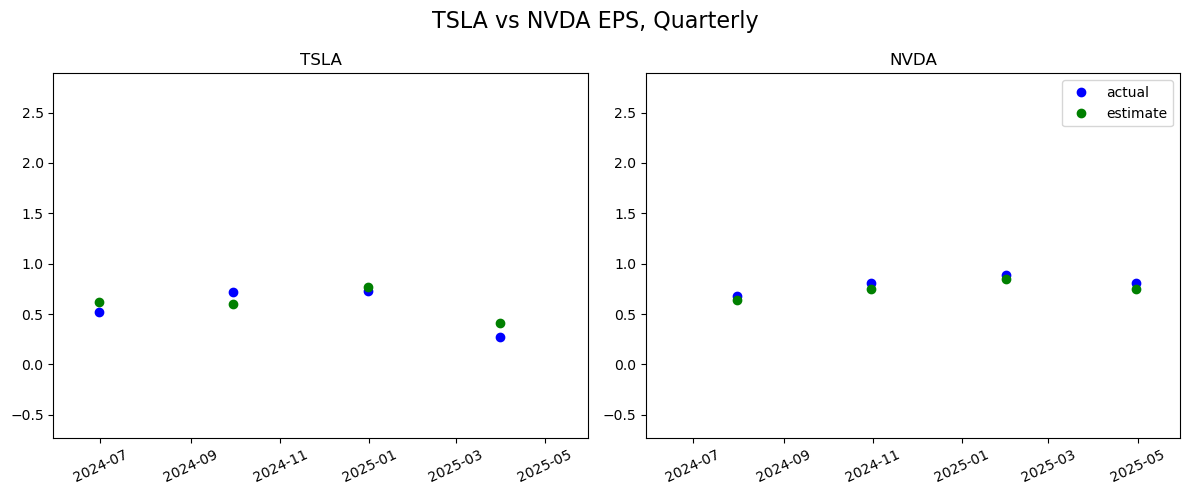

In [174]:
fig=plt.figure(figsize=(12,5))
plt.suptitle(f'{user_tick1} vs {user_tick2} EPS, Quarterly', fontsize=16)

ax1 = plt.subplot(1,2,1)           
act1,=plt.plot(eps_1['quarter'],eps_1['epsActual'],'bo')
est1,=plt.plot(eps_1['quarter'],eps_1['epsEstimate'],'go')
plt.axis([min(eps_1['quarter'])+pd.DateOffset(months=-1),max(max(eps_1['quarter']),max(eps_2['quarter']))+pd.DateOffset(months=1),y_min-1,y_max+2])
plt.xticks(rotation=25)
plt.title(f"{user_tick1}")

ax2= plt.subplot(1,2,2)           
plt.plot(eps_2['quarter'],eps_2['epsActual'],'bo')
plt.plot(eps_2['quarter'],eps_2['epsEstimate'],'go')
plt.axis([min(eps_1['quarter'])+pd.DateOffset(months=-1),max(max(eps_1['quarter']),max(eps_2['quarter']))+pd.DateOffset(months=1),y_min-1,y_max+2])
plt.xticks(rotation=25)
plt.title(f"{user_tick2}")

plt.legend((act1,est1),('actual','estimate'),loc='upper right')
      
plt.tight_layout()

ax1.xaxis